# Strava Fitness App Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# Set style
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")  # Modern seaborn theme
sns.set_palette("husl")

In [ ]:
def load_data(filepath):
    df = pd.read_csv(filepath, parse_dates=['ActivityDate'])
    df['Weekday'] = df['ActivityDate'].dt.day_name()
    df['WeekNumber'] = df['ActivityDate'].dt.isocalendar().week
    df['Hour'] = df['ActivityDate'].dt.hour  # If hourly data exists
    return df

df = load_data('/content/final merge dataset.csv')

In [ ]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDataQuality,...,ValidSamples,HourlyStepsTotal,HourlyCaloriesTotal,TotalIntensitySum,AverageIntensityAvg,PercentVeryActive,OverallDataQuality,Weekday,WeekNumber,Hour
0,1503960366,2016-04-12,13162.0,8.50,25,13,328,728,1985.0,Complete,...,NaN,13158.0,1988.0,429.0,0.297917,2.3,High,Tuesday,15,0
1,1503960366,2016-04-13,10735.0,6.97,21,19,217,776,1797.0,Complete,...,NaN,10735.0,1798.0,318.0,0.220833,2.0,High,Wednesday,15,0
2,1503960366,2016-04-14,10460.0,6.74,30,11,181,1218,1776.0,Complete,...,NaN,10460.0,1776.0,293.0,0.203472,2.1,High,Thursday,15,0
3,1503960366,2016-04-15,9762.0,6.28,29,34,209,726,1745.0,Complete,...,NaN,9685.0,1745.0,364.0,0.252778,2.9,High,Friday,15,0
4,1503960366,2016-04-16,12669.0,8.16,36,10,221,773,1863.0,Complete,...,NaN,12669.0,1866.0,349.0,0.242361,3.5,High,Saturday,15,0


In [ ]:
print(df.shape)

(940, 36)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                863 non-null    float64       
 3   TotalDistance             851 non-null    float64       
 4   VeryActiveMinutes         940 non-null    int64         
 5   FairlyActiveMinutes       940 non-null    int64         
 6   LightlyActiveMinutes      940 non-null    int64         
 7   SedentaryMinutes          940 non-null    int64         
 8   Calories                  934 non-null    float64       
 9   ActivityDataQuality       940 non-null    object        
 10  TotalMinutesAsleep        408 non-null    float64       
 11  TotalTimeInBed            410 non-null    float64       
 12  SleepEfficiency       

In [ ]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

0


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Id                            0
ActivityDate                  0
TotalSteps                   77
TotalDistance                89
VeryActiveMinutes             0
FairlyActiveMinutes           0
LightlyActiveMinutes          0
SedentaryMinutes              0
Calories                      6
ActivityDataQuality           0
TotalMinutesAsleep          532
TotalTimeInBed              530
SleepEfficiency             532
SleepDataQuality            530
WeightKg                    873
WeightPounds                873
BodyFatPercentage           938
BMI                         873
WeightDataQuality           873
IsManualReport              873
RestingHeartRate            917
MaxHeartRate                917
HR_Samples                  917
ValidSamples                917
HourlyStepsTotal              6
HourlyCaloriesTotal         725
TotalIntensitySum             6
AverageIntensityAvg           6
PercentVeryActive             0
OverallDataQuality            0
Weekday                       0
WeekNumb

In [ ]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance',
       'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
       'SedentaryMinutes', 'Calories', 'ActivityDataQuality',
       'TotalMinutesAsleep', 'TotalTimeInBed', 'SleepEfficiency',
       'SleepDataQuality', 'WeightKg', 'WeightPounds', 'BodyFatPercentage',
       'BMI', 'WeightDataQuality', 'IsManualReport', 'RestingHeartRate',
       'MaxHeartRate', 'HR_Samples', 'ValidSamples', 'HourlyStepsTotal',
       'HourlyCaloriesTotal', 'TotalIntensitySum', 'AverageIntensityAvg',
       'PercentVeryActive', 'OverallDataQuality', 'Weekday', 'WeekNumber',
       'Hour', 'RollingTotalSteps', 'RollingCalories',
       'RollingPercentVeryActive'],
      dtype='object')

In [ ]:
df.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,...,HourlyStepsTotal,HourlyCaloriesTotal,TotalIntensitySum,AverageIntensityAvg,PercentVeryActive,WeekNumber,Hour,RollingTotalSteps,RollingCalories,RollingPercentVeryActive
count,9.400000e+02,940,863.000000,851.000000,940.000000,940.000000,940.000000,940.000000,934.000000,408.000000,...,934.000000,215.000000,934.000000,934.000000,940.000000,940.0,940.0,933.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,8319.392816,6.063431,21.164894,13.564894,192.812766,992.742553,2318.291221,420.941176,...,7106.859743,1989.897674,284.763383,0.199428,1.837872,16.767021,0.0,8065.256114,2315.075707,1.833685
min,1.503960e+09,2016-04-12 00:00:00,4.000000,0.100000,0.000000,0.000000,0.000000,2.000000,120.000000,61.000000,...,0.000000,616.000000,0.000000,0.000000,0.000000,15.0,0.0,39.000000,1250.142857,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,4923.000000,3.455000,0.000000,0.000000,127.000000,730.000000,1837.250000,362.500000,...,3622.750000,1515.500000,164.000000,0.122396,0.000000,16.0,0.0,5765.000000,1890.857143,0.242857
50%,4.445115e+09,2016-04-26 00:00:00,8053.000000,5.660000,4.000000,6.000000,199.000000,1059.000000,2148.500000,433.000000,...,7123.000000,1897.000000,300.000000,0.210417,0.300000,17.0,0.0,7759.833333,2172.214286,0.985714
75%,6.962181e+09,2016-05-04 00:00:00,11092.500000,7.985000,32.000000,19.000000,264.000000,1231.500000,2795.500000,490.500000,...,10239.000000,2385.000000,398.000000,0.277083,2.800000,18.0,0.0,10355.857143,2713.892857,2.603571
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000,796.000000,...,22770.000000,3843.000000,904.000000,0.627778,25.000000,19.0,0.0,23186.000000,3884.333333,14.028571
std,2.424805e+09,NaN,4744.967224,3.678938,32.844803,19.987404,109.174700,299.879794,696.613510,116.194962,...,4508.849107,562.175762,166.746898,0.115340,3.017533,1.284783,0.0,3643.606872,572.233436,2.268222


In [ ]:
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

Id: 33 unique values
ActivityDate: 31 unique values
TotalSteps: 841 unique values
TotalDistance: 608 unique values
VeryActiveMinutes: 122 unique values
FairlyActiveMinutes: 81 unique values
LightlyActiveMinutes: 335 unique values
SedentaryMinutes: 548 unique values
Calories: 731 unique values
ActivityDataQuality: 2 unique values
TotalMinutesAsleep: 254 unique values
TotalTimeInBed: 242 unique values
SleepEfficiency: 403 unique values
SleepDataQuality: 2 unique values
WeightKg: 34 unique values
WeightPounds: 34 unique values
BodyFatPercentage: 2 unique values
BMI: 36 unique values
WeightDataQuality: 1 unique values
IsManualReport: 2 unique values
RestingHeartRate: 8 unique values
MaxHeartRate: 20 unique values
HR_Samples: 22 unique values
ValidSamples: 23 unique values
HourlyStepsTotal: 836 unique values
HourlyCaloriesTotal: 186 unique values
TotalIntensitySum: 420 unique values
AverageIntensityAvg: 737 unique values
PercentVeryActive: 109 unique values
OverallDataQuality: 3 unique valu

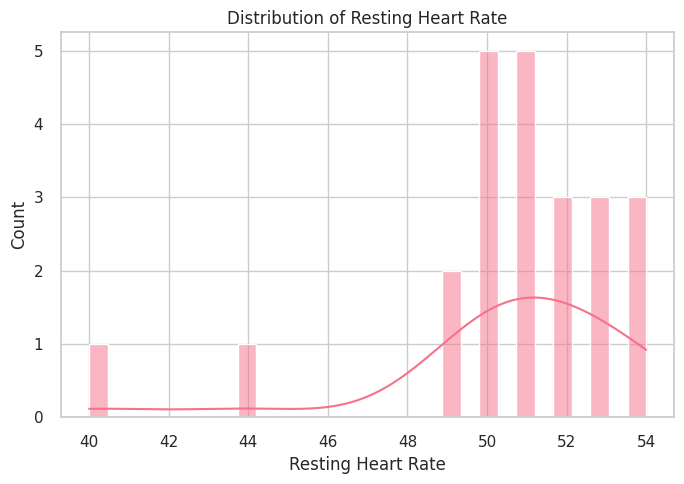

In [ ]:
# 1. Heart Rate Distribution
plt.figure(figsize=(7, 5))
sns.histplot(df['RestingHeartRate'].dropna(), bins=30, kde=True)
plt.title('Distribution of Resting Heart Rate')
plt.xlabel('Resting Heart Rate')
plt.tight_layout()
plt.show()

<ipython-input-10-408386659>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=steps_by_day.index, y=steps_by_day.values, palette='Blues_d')


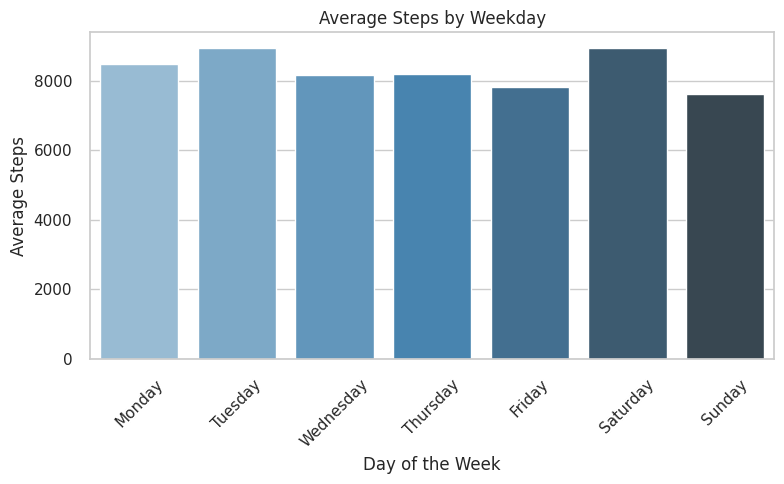

In [ ]:
# 2. Average Steps by Weekday
plt.figure(figsize=(8, 5))
steps_by_day = df.groupby('Weekday')['TotalSteps'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=steps_by_day.index, y=steps_by_day.values, palette='Blues_d')
plt.title('Average Steps by Weekday')
plt.ylabel('Average Steps')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

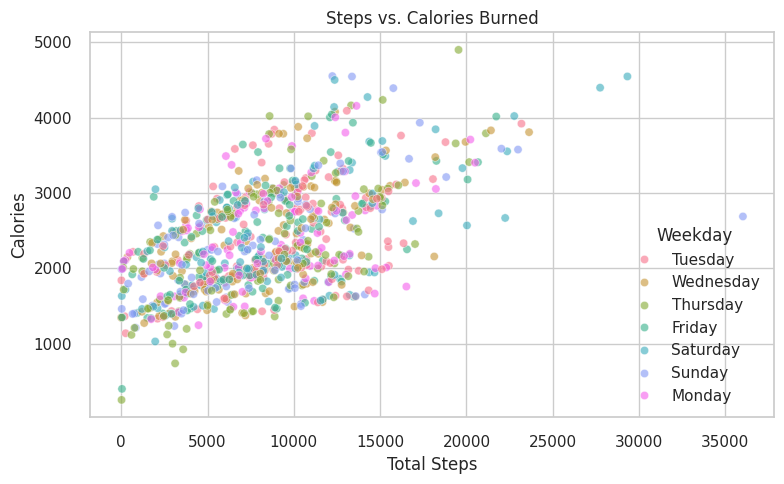

In [ ]:
# 3. Relationship: Steps vs Calories
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='TotalSteps', y='Calories', hue='Weekday', alpha=0.6)
plt.title('Steps vs. Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.legend(title='Weekday')
plt.tight_layout()
plt.show()

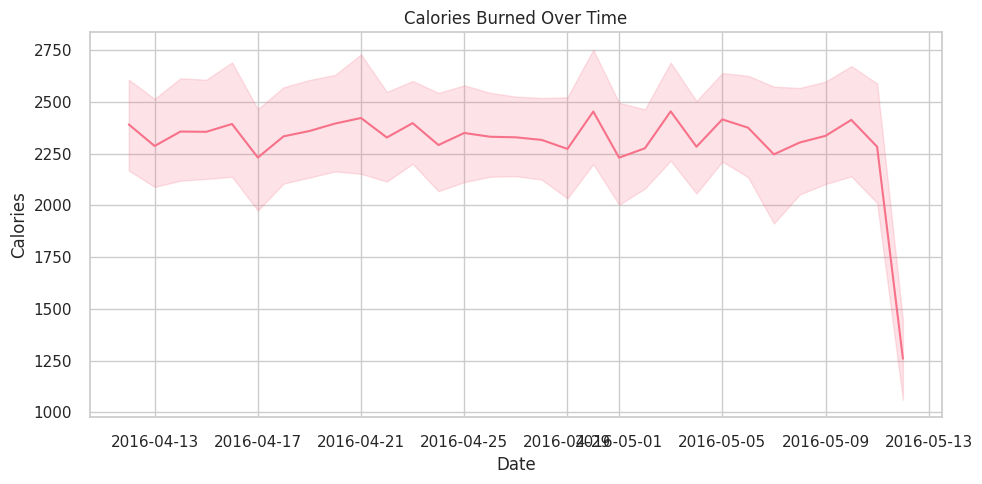

In [ ]:
# 4. Calories Burned Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='ActivityDate', y='Calories')
plt.title('Calories Burned Over Time')
plt.ylabel('Calories')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

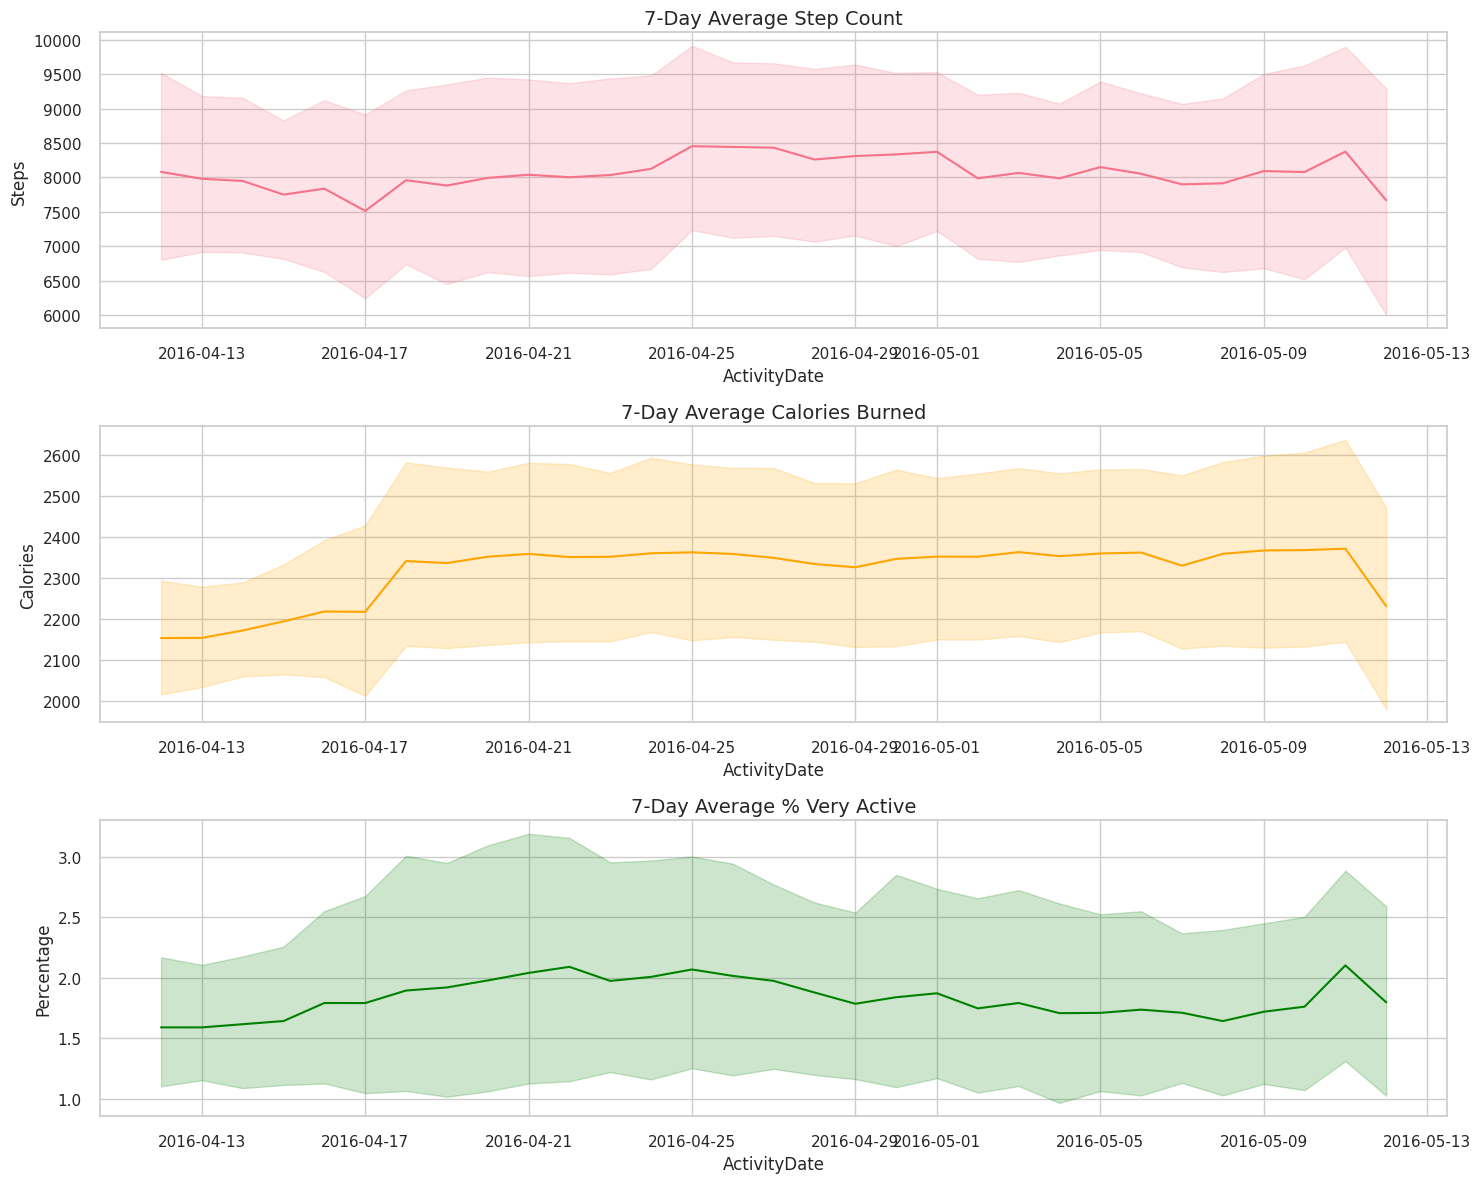

In [ ]:
# 5. Activity Trends Over Time
def plot_trends(df):
    try:
        fig, ax = plt.subplots(3, 1, figsize=(15, 12))

        # Calculate rolling averages safely
        for col in ['TotalSteps', 'Calories', 'PercentVeryActive']:
            if col in df.columns:
                df[f'Rolling{col}'] = df[col].rolling(7, min_periods=1).mean()

        # Plot steps if available
        if 'TotalSteps' in df.columns:
            sns.lineplot(data=df, x='ActivityDate', y='RollingTotalSteps', ax=ax[0])
            ax[0].set_title('7-Day Average Step Count', fontsize=14)
            ax[0].set_ylabel('Steps')

        # Plot calories if available
        if 'Calories' in df.columns:
            sns.lineplot(data=df, x='ActivityDate', y='RollingCalories', ax=ax[1], color='orange')
            ax[1].set_title('7-Day Average Calories Burned', fontsize=14)
            ax[1].set_ylabel('Calories')

        # Plot activity percentage if available
        if 'PercentVeryActive' in df.columns:
            sns.lineplot(data=df, x='ActivityDate', y='RollingPercentVeryActive', ax=ax[2], color='green')
            ax[2].set_title('7-Day Average % Very Active', fontsize=14)
            ax[2].set_ylabel('Percentage')

        plt.tight_layout()
        plt.savefig('activity_trends.png', dpi=300, bbox_inches='tight')
        plt.show()

    except Exception as e:
        print(f"Error generating trends plot: {str(e)}")
plot_trends(df)

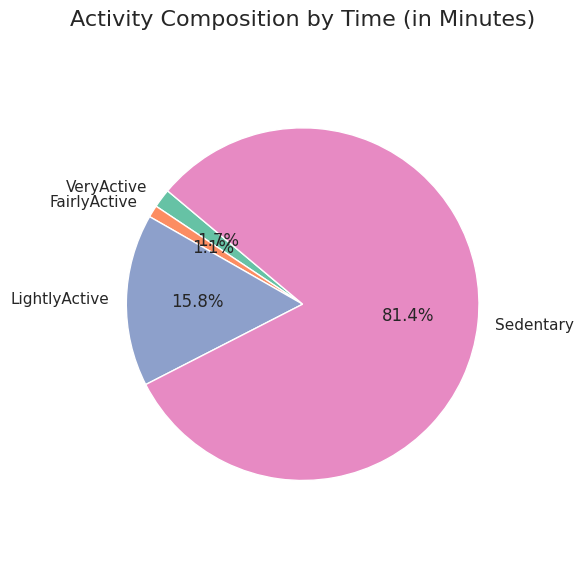

In [ ]:
# 6. Activity Composition
def plot_activity_composition(df):
    try:

        # Define the activity columns
        activity_cols = ['VeryActiveMinutes', 'FairlyActiveMinutes',
                         'LightlyActiveMinutes', 'SedentaryMinutes']

        # Check which activity columns are present
        available_cols = [col for col in activity_cols if col in df.columns]

        if not available_cols:
            print("No activity columns found in the dataset.")
            return

        # Sum total minutes across all users
        activity_totals = df[available_cols].sum()

        # Set pie chart labels
        labels = [col.replace("Minutes", "") for col in available_cols]

        # Plotting the pie chart
        plt.figure(figsize=(6, 6))
        plt.pie(
            activity_totals,
            labels=labels,
            autopct='%1.1f%%',
            startangle=140,
            colors=sns.color_palette("Set2", len(available_cols))
        )
        plt.title('Activity Composition by Time (in Minutes)', fontsize=16)
        plt.axis('equal')  # Equal aspect ratio ensures pie is circular
        plt.tight_layout()
        plt.savefig('activity_pie_chart.png', dpi=200)
        plt.show()

    except Exception as e:
        print(f"Error: {e}")


plot_activity_composition(df)


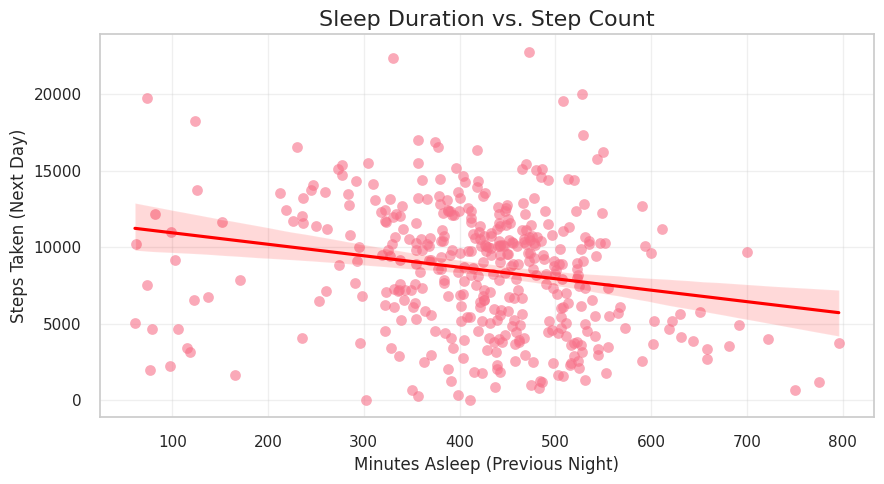

In [ ]:
# 7. Sleep Duration Vs Step Count
def plot_sleep_activity(df):
    try:
        required_cols = ['TotalMinutesAsleep', 'TotalTimeInBed', 'TotalSteps']
        if not all(col in df.columns for col in required_cols):
            print(f"Missing columns for sleep-activity plot. Need: {required_cols}")
            return

        # Calculate sleep efficiency safely
        df['SleepEfficiency'] = df['TotalMinutesAsleep'] / df['TotalTimeInBed'].replace(0, np.nan)

        # Clean data for plot
        plot_df = df.dropna(subset=['TotalMinutesAsleep', 'TotalSteps'])

        # Plotting
        plt.figure(figsize=(9, 5))
        sns.regplot(
            x='TotalMinutesAsleep',
            y='TotalSteps',
            data=plot_df,
            scatter_kws={'alpha': 0.6, 's': 60},
            line_kws={'color': 'red'}
        )

        plt.title('Sleep Duration vs. Step Count', fontsize=16)
        plt.xlabel('Minutes Asleep (Previous Night)', fontsize=12)
        plt.ylabel('Steps Taken (Next Day)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('sleep_activity_correlation.png', dpi=300)
        plt.show()

    except Exception as e:
        print(f"Error generating sleep-activity plot: {str(e)}")

plot_sleep_activity(df)


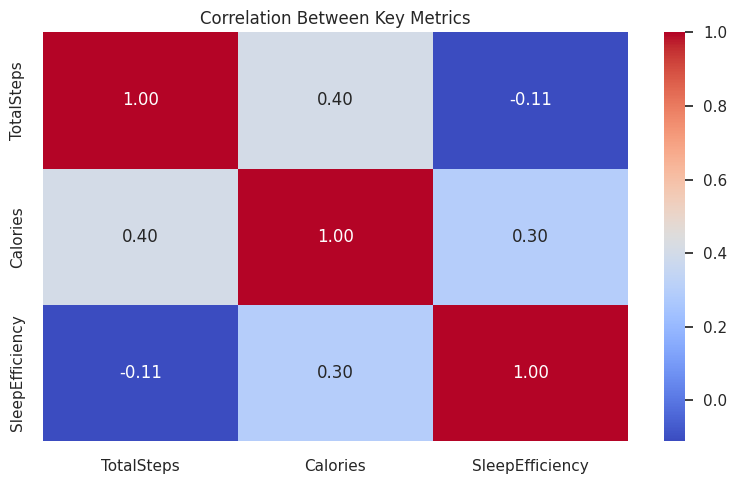

In [ ]:
# 8. Correlation Heatmap
plt.figure(figsize=(8, 5))
numeric_cols = df[['TotalSteps', 'Calories', 'SleepEfficiency']].dropna()
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Key Metrics')
plt.tight_layout()
plt.show()